In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy
from astropy import stats
import astropy.units as u
from astropy.constants import k_B

In [3]:
ls C:\Users\jarde\Documents\Advanced_lab_data\lab05\data_day1

 Volume in drive C has no label.
 Volume Serial Number is F64F-FF16

 Directory of C:\Users\jarde\Documents\Advanced_lab_data\lab05\data_day1

12/06/2021  06:51 PM    <DIR>          .
12/06/2021  06:51 PM    <DIR>          ..
12/06/2021  06:53 PM    <DIR>          01_processed
12/06/2021  06:57 PM    <DIR>          02_processed
12/06/2021  06:59 PM    <DIR>          03_processed
12/06/2021  05:39 PM    <DIR>          04_processed
12/06/2021  05:47 PM    <DIR>          05_processed
12/06/2021  05:08 PM    <DIR>          calibration
12/06/2021  06:45 PM    <DIR>          mTRAP01____laser
12/06/2021  05:11 PM    <DIR>          mTRAP02_angled
11/23/2021  11:26 AM        71,176,943 mTRAP02_angled.zip
12/06/2021  05:14 PM    <DIR>          mTRAP03_angled_transient
11/23/2021  11:26 AM        54,465,292 mTRAP03_angled_transient.zip
11/23/2021  11:26 AM        64,601,277 mTRAP04_perp_laser.zip
12/06/2021  05:18 PM    <DIR>          mTRAP04_prep_laser
12/06/2021  05:42 PM    <DIR>          mTRA

directory = "C:/Users/jarde/Documents/Advanced_lab_data/lab05/data_day1/mTRAP02_angled/mTRAP02_angled/"
im = Image.open(f"{directory}/image_04000.png")
plt.imshow(im, cmap='Greys_r')
plt.show()
plt.imshow(im.crop((50,20, 70,80)), cmap='Greys_r')
plt.show()

In [4]:
ls data_day1

 Volume in drive C has no label.
 Volume Serial Number is F64F-FF16

 Directory of C:\Users\jarde\Documents\GitHub\AdvancedLab-PHSX444\lab05\data_day1

11/23/2021  11:26 AM    <DIR>          .
11/23/2021  11:26 AM    <DIR>          ..
11/23/2021  11:26 AM    <DIR>          calibration
11/23/2021  11:26 AM        71,176,943 mTRAP02_angled.zip
11/23/2021  11:26 AM        54,465,292 mTRAP03_angled_transient.zip
11/23/2021  11:26 AM        64,601,277 mTRAP04_perp_laser.zip
11/23/2021  11:26 AM        64,883,589 mTRAP05_perp_laser_transient.zip
               4 File(s)    255,127,101 bytes
               3 Dir(s)  129,258,926,080 bytes free


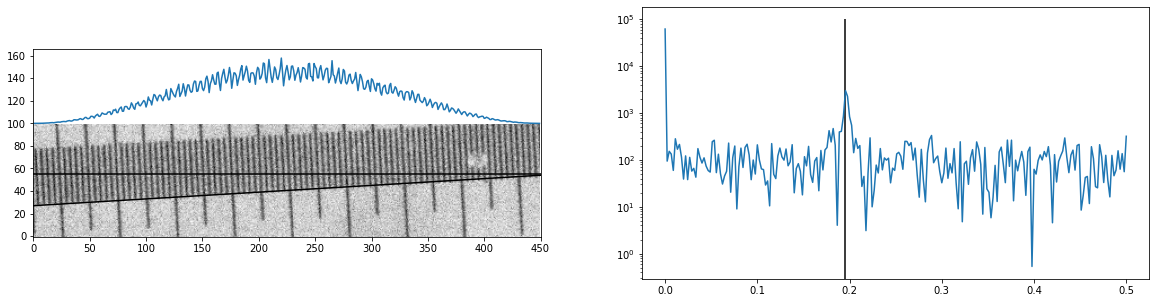

5.122832639877897


In [5]:
im = Image.open("data_day1/calibration/horizontal/image_00000.png")
im = im.crop((150, 150, 600, 250))
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.imshow(im, origin='lower', cmap='Greys_r')
plt.hlines(55, 0, 450, color='black')
x=np.linspace(0,450, 1000)
plt.plot(x, 0.06*x +27, color='black')
dat = np.array(im)[55]
dat = dat * np.hanning(len(dat))
plt.plot(dat/3 + 100)
plt.xlim(0, 450)

plt.subplot(1,2,2)
amp = np.abs(np.fft.rfft(np.array(im)[55]).real)
freq = np.fft.rfftfreq(len(np.array(im)[55]))
plt.plot(freq,amp)
freq_peak = np.abs(freq[list(amp).index(np.max(amp[np.abs(freq)> 0.01]))])
plt.vlines(freq_peak, 0, 1e5, color='black')
# plt.xlim(0.01, 0.4)
plt.yscale('log')
plt.show()
print((1/freq_peak)/np.cos(np.arctan(0.06)))

hort_peak = 1/freq_peak

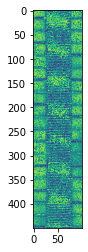

In [6]:
im = np.array(Image.open(f"data_day1/calibration/vertical/image_00009.png"))
for i in range(9):
    pic = np.array(Image.open(f"data_day1/calibration/vertical/image_0000{i}.png"))
    im += pic
im = Image.fromarray(im)
im = im.crop((450, 100, 550, 550))
plt.imshow(im)

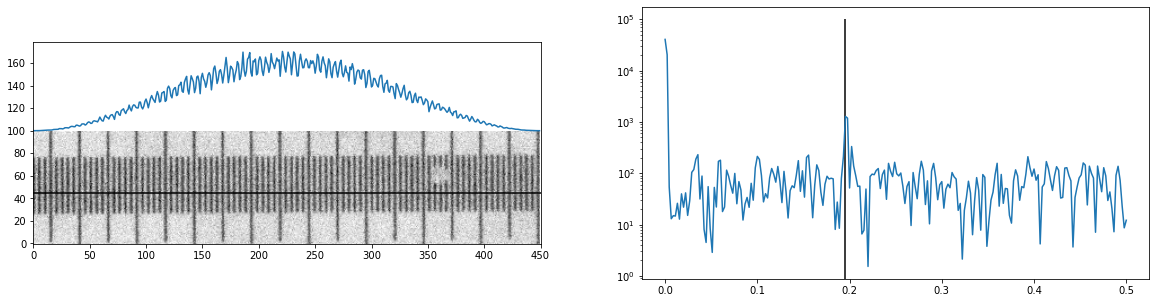

5.113636363636363


In [7]:
im = Image.open("data_day1/calibration/vertical/image_00000.png")
im = im.crop((450, 100, 550, 550))
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.imshow(np.array(im).T, origin='lower', cmap='Greys_r')
plt.hlines(45, 0, 450, color='black')
dat = np.array(im)[:, 45]
dat = dat * np.hanning(len(dat))
plt.plot(dat/3 + 100)
plt.xlim(0, 450)

plt.subplot(1,2,2)
amp = np.abs(np.fft.rfft(dat).real)
freq = np.fft.rfftfreq(len(dat))
plt.plot(freq,amp)
freq_peak = np.abs(freq[list(amp).index(np.max(amp[np.abs(freq)> 0.01]))])
plt.vlines(freq_peak, 0, 1e5, color='black')
# plt.xlim(0.01, 0.4)
plt.yscale('log')
plt.show()
print(1/freq_peak)

vert_peak = 1/freq_peak

In [8]:
xpix = u.def_unit('xpix', 10*u.um/hort_peak)
ypix = u.def_unit('ypix', 10*u.um/vert_peak)

In [9]:
ls data_day2\raw

The system cannot find the file specified.


In [10]:
path = 'C:/Users/jarde/Documents/advanced_lab_data/lab05/'
file_names = {
    '01': path + 'data_01.csv',
    '02': path + 'data_02.csv',
    '03': path + 'data_03.csv',
    '04': path + 'data_04.csv',
    '05': path + 'data_05.csv',
    
    '11': path + 'data_11.csv',
    '12': path + 'data_12.csv',
    '13': path + 'data_13.csv',
    '14': path + 'data_14.csv',
    '15': path + 'data_15.csv',
    '16': path + 'data_16.csv',
    '17': path + 'data_17.csv',
    '18': path + 'data_18.csv',
    '19': path + 'data_19.csv',
    '20': path + 'data_20.csv',
}

In [11]:
def calc_mass(fit):
    t = 298.15 * u.Kelvin
    m = (fit * (-2 * k_B * t) / (u.mm / u.s) ** 2).to(u.kg)
    return m

In [12]:
def v2_plot(data, vel, tit, dt, plot=True):   
    his = np.histogram(vel, bins=int(5e2))
    his, bins = his[0][np.where(his[0]>10)], (his[1][np.where(his[0]>10)])
    
    fit, res, _, _, _ = np.polyfit(bins + (bins[1]-bins[0])/2, np.log(his), 1, w=np.sqrt((np.sqrt(np.log(his))**2 + np.mean(data['error'])**2)),
                                    cov=True, full=True)
    fit, cov = np.polyfit(bins + (bins[1]-bins[0])/2, np.log(his), 1, w=np.sqrt((np.sqrt(np.log(his))**2 + np.mean(data['error'])**2)), cov=True)
    chisq_red = float(res / (len(bins) - 2))
    err_a = np.sqrt(cov[0, 0])
    
    if plot:
        plt.figure(figsize=(20,5))
        plt.subplot(1,3,1)
        plt.errorbar(bins, his, xerr = (2*np.mean(data['error'])/dt)**2/his, yerr=np.sqrt(his), linestyle="none", marker=".")    

        plt.plot(bins, np.exp(fit[0]*bins + fit[1]), color='black')
        plt.yscale('log')
        plt.title(tit)

        plt.subplot(1,3,2)
        res = fit[0]*bins + fit[1] - np.log(his)
        plt.errorbar(bins, res, yerr=np.log(np.sqrt(his)), linestyle='none', marker='x')
        plt.hlines(0, bins[0], bins[-1], color='black')
        plt.title('Residuals')
        plt.subplot(1,3,3)
        plt.errorbar(bins, res, yerr=np.log(np.sqrt(his)), linestyle='none', marker='x')
        plt.hlines(0, bins[0], bins[-1], color='black')
        plt.title('Residuals (zoomed)')
        plt.ylim(2* np.min(res), 2* np.max(res))
        plt.show()
    return fit[0], err_a, chisq_red

In [13]:
def plot_x(data, dt):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    plt.plot(data['x'])
    plt.title('x')

    plt.subplot(1,3,2)
    plt.plot(data['y'])
    plt.title('y')

    plt.subplot(1,3,3)
    plt.plot(data['d'])
    plt.title('d')
    plt.show()
    
def plot_fft(data, dt):
    plt.figure(figsize=(20,5))
    use_x = data['x'][np.logical_not(np.isnan(data['x']))]
    data_freq = np.fft.fft(use_x).real
    t = np.arange(len(use_x))*dt
    freq = np.fft.fftfreq(t.shape[-1])

    plt.subplot(1,3,1)
    plt.plot(freq, np.abs(data_freq))
    plt.yscale('log')
#     plt.xlim(-0.01, 0.2)
    plt.title('Freq - x')

    use_y = data['y'][np.logical_not(np.isnan(data['y']))]
    data_freq = np.fft.fft(use_y).real
    t = np.arange(len(use_y))*dt
    freq = np.fft.fftfreq(t.shape[-1])

    plt.subplot(1,3,2)
    plt.plot(freq, np.abs(data_freq))
    plt.yscale('log')
#     plt.xlim(-0.01, 0.2)
    plt.title('Freq - y')

    use_d = data['d'][np.logical_not(np.isnan(data['d']))]
    data_freq = np.fft.fft(use_d).real
    t = np.arange(len(use_d))*dt
    freq = np.fft.fftfreq(t.shape[-1])

    plt.subplot(1,3,3)
    plt.plot(freq, np.abs(data_freq))
    plt.yscale('log')
#     plt.xlim(-0.01, 0.2)
    plt.title('Freq - d')
    plt.show()

In [14]:
def quick_anal(fil, dt, plot=True):
    print(file_names[fil])
    data = pd.read_csv(file_names[fil])
    data.rename(columns= {'# x': 'x'}, inplace=True)
    
    data['x'] = (np.array(data['x'])*xpix).to(u.um)
    data['y'] = (np.array(data['y'])*ypix).to(u.um)
    data['error'] = (np.array(data['error'])*((1 * xpix)**2 + (1 * ypix)**2)**(1/2)).to(u.um)
    data['x'] = stats.sigma_clip(data['x'], sigma=5)
    data['y'] = stats.sigma_clip(data['y'], sigma=4)
    
    data['d'] = np.sqrt(data['y']**2 + data['x']**2)

    if plot:
        plot_x(data, dt)
        plot_fft(data, dt)
    
    vels = (np.array(data['d'][:-1])-np.array(data['d'][1:]))/dt
    velsx = (np.array(data['x'][:-1])-np.array(data['x'][1:]))/dt
    velsy = (np.array(data['y'][:-1])-np.array(data['y'][1:]))/dt

    vels2 = vels[np.logical_not(np.isnan(vels))]**2
    velsx2 = velsx[np.logical_not(np.isnan(velsx))]**2
    velsy2 = velsy[np.logical_not(np.isnan(velsy))]**2
    
    fitd, fitd_err, chid = v2_plot(data, vels2, r'Euclidian Sum $v^2$', dt,  plot)
    fitx, fitx_err, chix  = v2_plot(data, velsx2, r'$v_x^2$', dt,  plot)
    fity, fity_err, chiy  = v2_plot(data, velsy2, r'$v_y^2$', dt,  plot)

    print(f"d mass: {calc_mass(fitd):.2e} +/- {abs(calc_mass(fitd_err)):.2e}; chi2_red: {chid:.4f}")
    print(f"x mass: {calc_mass(fitx):.2e} +/- {abs(calc_mass(fitx_err)):.2e}; chi2_red: {chix:.4f}")
    print(f"y mass: {calc_mass(fity):.2e} +/- {abs(calc_mass(fity_err)):.2e}; chi2_red: {chiy:.4f}\n")

In [36]:
quick_anal('11', 1/468.604, plot=False)
quick_anal('12', 1/468.604, plot=False)
quick_anal('13', 1/468.604, plot=False)
# quick_anal('14', 1/468.604, plot=False)
quick_anal('15', 1/468.604, plot=False)
quick_anal('16', 1/468.604, plot=False)
quick_anal('17', 1/468.604, plot=False)
quick_anal('18', 1/468.604, plot=False)
quick_anal('19', 1/468.604, plot=False)
quick_anal('20', 1/468.604, plot=False)

C:/Users/jarde/Documents/advanced_lab_data/lab05/data_11.csv
d mass: 3.35e-19 kg +/- 1.06e-20 kg; chi2_red: 0.7128
x mass: 2.11e-19 kg +/- 6.76e-21 kg; chi2_red: 0.3996
y mass: 2.03e-19 kg +/- 9.87e-21 kg; chi2_red: 0.7360

C:/Users/jarde/Documents/advanced_lab_data/lab05/data_12.csv
d mass: 8.65e-21 kg +/- 3.08e-22 kg; chi2_red: 0.9274
x mass: 1.55e-21 kg +/- 5.30e-23 kg; chi2_red: 0.7985
y mass: 1.11e-20 kg +/- 4.12e-22 kg; chi2_red: 0.5003

C:/Users/jarde/Documents/advanced_lab_data/lab05/data_13.csv
d mass: 2.68e-19 kg +/- 9.00e-21 kg; chi2_red: 0.7251
x mass: 1.62e-19 kg +/- 7.95e-21 kg; chi2_red: 0.9461
y mass: 1.45e-19 kg +/- 5.14e-21 kg; chi2_red: 0.5188

C:/Users/jarde/Documents/advanced_lab_data/lab05/data_15.csv
d mass: 3.00e-19 kg +/- 9.07e-21 kg; chi2_red: 0.6199
x mass: 1.70e-19 kg +/- 1.14e-20 kg; chi2_red: 1.3274
y mass: 1.89e-19 kg +/- 5.84e-21 kg; chi2_red: 0.3281

C:/Users/jarde/Documents/advanced_lab_data/lab05/data_16.csv
d mass: 3.99e-19 kg +/- 1.20e-20 kg; chi2_r

In [16]:
quick_anal('01', 1/360, plot=False)
quick_anal('02', 1/360, plot=False)
quick_anal('03', 1/360, plot=False)
quick_anal('04', 1/360, plot=False)
quick_anal('05', 1/360, plot=False)

C:/Users/jarde/Documents/advanced_lab_data/lab05/data_01.csv
d mass: 2.28e-19 kg +/- 9.33e-21 kg; chi2_red: 0.7712
x mass: 2.02e-19 kg +/- 1.34e-20 kg; chi2_red: 1.4277
y mass: 1.39e-19 kg +/- 5.93e-21 kg; chi2_red: 0.5711

C:/Users/jarde/Documents/advanced_lab_data/lab05/data_02.csv
d mass: 1.82e-19 kg +/- 1.06e-20 kg; chi2_red: 1.6360
x mass: 1.10e-19 kg +/- 9.27e-21 kg; chi2_red: 2.9668
y mass: 1.47e-19 kg +/- 1.14e-20 kg; chi2_red: 2.5564

C:/Users/jarde/Documents/advanced_lab_data/lab05/data_03.csv
d mass: 1.28e-19 kg +/- 8.54e-21 kg; chi2_red: 1.7976
x mass: 5.95e-20 kg +/- 5.36e-21 kg; chi2_red: 3.1202
y mass: 8.40e-20 kg +/- 1.43e-20 kg; chi2_red: 5.3366

C:/Users/jarde/Documents/advanced_lab_data/lab05/data_04.csv
d mass: 4.19e-19 kg +/- 1.57e-20 kg; chi2_red: 0.6596
x mass: 1.93e-19 kg +/- 1.05e-20 kg; chi2_red: 0.8440
y mass: 2.43e-19 kg +/- 9.10e-21 kg; chi2_red: 0.3979

C:/Users/jarde/Documents/advanced_lab_data/lab05/data_05.csv
d mass: 3.11e-19 kg +/- 1.25e-20 kg; chi2_r

In [ ]:
quick_anal('05')

In [ ]:
quick_anal('11', 1/450)

In [ ]:
from astropy.constants import m_p
m_p.to(u.kg)

In [ ]:
fil = '05'

data = pd.read_csv(file_names[fil])
data.rename(columns= {'# x': 'x'}, inplace=True)
dt = 1/360

data['x'] = stats.sigma_clip(data['x'], sigma=5)
data['y'] = stats.sigma_clip(data['y'], sigma=4)
data['d'] = np.sqrt(data['y']**2 + data['x']**2)

vels = (np.array(data['d'][:-1])-np.array(data['d'][1:]))/dt
velsx = (np.array(data['x'][:-1])-np.array(data['x'][1:]))/dt
velsy = (np.array(data['y'][:-1])-np.array(data['y'][1:]))/dt

vels2 = vels[np.logical_not(np.isnan(vels))]**2
velsx2 = velsx[np.logical_not(np.isnan(velsx))]**2
velsy2 = velsy[np.logical_not(np.isnan(velsy))]**2

In [ ]:
use_x = data['x'][np.logical_not(np.isnan(data['x']))]
data_freq = np.fft.fft(use_x).real
t = np.arange(len(use_x))*dt
freq = np.fft.fftfreq(t.shape[-1])

plt.subplot(1,3,1)
plt.plot(freq, np.abs(data_freq))
plt.yscale('log')
plt.xlim(-0.01, 0.2)
plt.title('Freq - x')

use_y = data['y'][np.logical_not(np.isnan(data['y']))]
data_freq = np.fft.fft(use_y).real
t = np.arange(len(use_y))*dt
freq = np.fft.fftfreq(t.shape[-1])

plt.subplot(1,3,2)
plt.plot(freq, np.abs(data_freq))
plt.yscale('log')
plt.xlim(-0.01, 0.2)
plt.title('Freq - y')

use_d = data['d'][np.logical_not(np.isnan(data['d']))]
data_freq = np.fft.fft(use_d).real
t = np.arange(len(use_d))*dt
freq = np.fft.fftfreq(t.shape[-1])

plt.subplot(1,3,3)
plt.plot(freq, np.abs(data_freq))
plt.yscale('log')
plt.xlim(-0.01, 0.2)
plt.title('Freq - d')
plt.show()

In [ ]:
im = Image.open('data_day1/mTRAP04_perp_laser_processed/image_02000.png')
im = im.crop((5,10,15,20))
plt.imshow(im)
plt.hlines(4, 5,8, color='red')

#radius of about 1.5 pix

In [ ]:
m = 2.43e-19 * u.kg
r = (1.5*xpix).to(u.um)
v = 4*np.pi*(r**3)/3
0.00009 / (m/v).to(u.g/u.cm**3)

In [ ]:
f"{0.00009:e}"

In [ ]:
file_names['04'][:-12]

In [ ]:
ls data_day1\mTrap02_angled_processed\image_00000.png